# **Setup**

**References**
* https://www.youtube.com/watch?v=QpzMWQvxXWk

**Notes**
1. VADER (Valence Aware Dictionary And Sentiment Reasoner) - Bag Of Words Approach
2. Roberta Pre-Trained Model By Hugging Face
3. Hugging Face Pipeline

In [166]:
import pandas as pd
import numpy as np 
import pickle
from IPython.display import clear_output
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')

import nltk
nltk.download('punkt')   # Download Tokenizer Data
nltk.download('averaged_perceptron_tagger') # Download POS Tagging Data
nltk.download('maxent_ne_chunker') # Download Chunking Data
nltk.download('words')
nltk.download('vader_lexicon') # Download Sentiment Intensity Analyzer Data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# **Data Import**

In [167]:
df = pd.read_csv('Reviews.csv')
# df = df.loc[:500,:]
print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## **Reviews**

In [168]:
df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

# **Data Exploration**

In [169]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

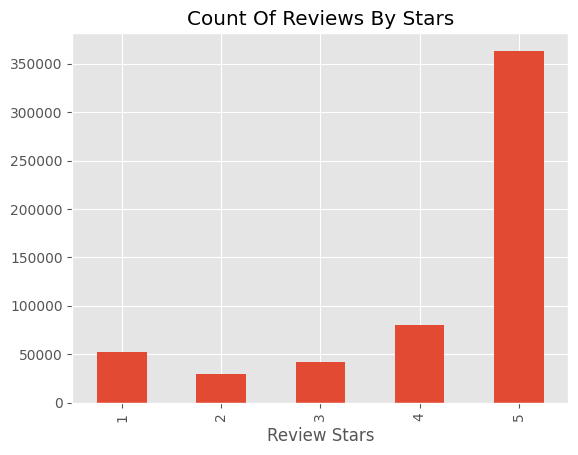

In [170]:
ax = df['Score'].value_counts().sort_index(). \
    plot(kind='bar',title='Count Of Reviews By Stars')

ax.set_xlabel('Review Stars')
plt.show()

# **Basic NLTK**

In [171]:
text_data = df['Text'][50]
text_data

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

## **Tokenize**

In [172]:
# Tokenize Words
tokens = nltk.word_tokenize(text=text_data)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

## **POS Tagging**

In [173]:
# POS Tagging
tokens_tagged = nltk.pos_tag(tokens=tokens)
tokens_tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

## **Chunking**

In [174]:
# Chunk The Tokens Based On POS Tags
entities = nltk.chunk.ne_chunk(tokens_tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# **Data Processing**

# **Data Cleaning**

## **Stop Word Removal**

# **VADER Sentiment Scoring**

In [175]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

## **Create SIA**

In [176]:
SIA = SentimentIntensityAnalyzer()
SIA

In [177]:
# Check SIA Performance
print('Happy',':',SIA.polarity_scores('Happy'))
print('Sad',':',SIA.polarity_scores('Sad'))
print('Its Great',':',SIA.polarity_scores('Its Great'))
print('This could have been even better',':',SIA.polarity_scores('This could have been even better'))

Happy : {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
Sad : {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4767}
Its Great : {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
This could have been even better : {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}


In [178]:
# Check Polarity Score For Row #50
SIA.polarity_scores(df['Text'][50])

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

## **Calculate Polarity Score For Data**

In [179]:
# for i,row in tqdm(df.iterrows(),total=len(df)):
#     text = row['Text']
    
#     # Calculate SIA Score
#     SIA_Score = SIA.polarity_scores(text)
    
#     # Add SIA Scores To Dataframe
#     row['SIA_neg'] = SIA_Score['neg']
#     row['SIA_neu'] = SIA_Score['neu']
#     row['SIA_pos'] = SIA_Score['pos']
#     row['SIA_comp'] = SIA_Score['compound']

In [180]:
df.shape

(568454, 10)

In [181]:
for i in range(len(df)):
    text = df.loc[i,'Text']
    
    # Calculate VADER Score
    VADER_Score = SIA.polarity_scores(text)
    
    # Add VADER Scores To Dataframe
    df.loc[i,'VADER_neg'] = VADER_Score['neg']
    df.loc[i,'VADER_neu'] = VADER_Score['neu']
    df.loc[i,'VADER_pos'] = VADER_Score['pos']
    df.loc[i,'VADER_comp'] = VADER_Score['compound']

In [182]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,VADER_neg,VADER_neu,VADER_pos,VADER_comp
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468


## **Visualize Results**

<Axes: xlabel='Score', ylabel='VADER_comp'>

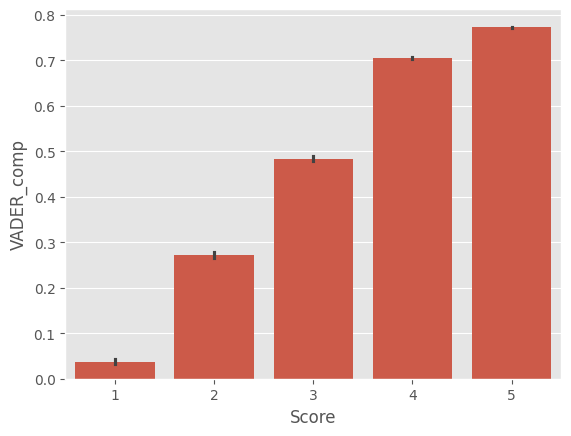

In [183]:
sns.barplot(data=df,x='Score',y='VADER_comp')

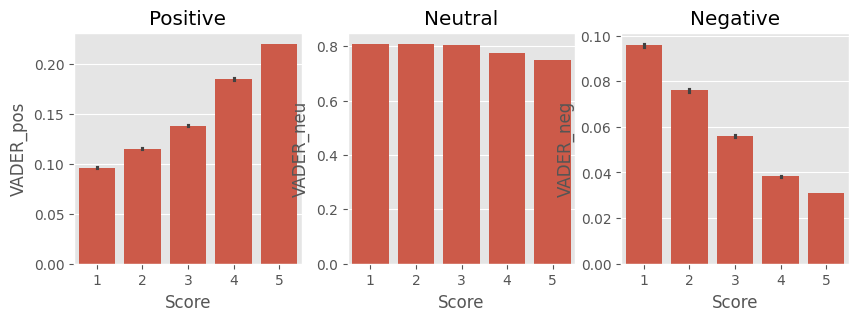

In [184]:
fig, axs = plt.subplots(1,3,figsize=(10,3))
sns.barplot(data=df,x='Score',y='VADER_pos',ax=axs[0])
sns.barplot(data=df,x='Score',y='VADER_neu',ax=axs[1])
sns.barplot(data=df,x='Score',y='VADER_neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

## **Data Export 01**

In [185]:
# Create Restore Point
print('Data Export - Shape: ',df.shape)
df.to_pickle('Reviews_Processed_Data_01.pkl')

Data Export - Shape:  (568454, 14)


In [186]:
# Load Data From Restore Point
file = open('Reviews_Processed_Data_01.pkl','rb')
df = pickle.load(file)  # Needs Pandas Version < 2.0

# Dataframe Shape Before Removing Outliers
df.shape

(568454, 14)

# **Hugging Face Transformers**

In [187]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

## **Create Model**

In [188]:
Transformer_Model_Name = f'cardiffnlp/twitter-roberta-base-sentiment'
Tranformer_tokenizer = AutoTokenizer.from_pretrained(Transformer_Model_Name)
Transformer_Model = AutoModelForSequenceClassification.from_pretrained(Transformer_Model_Name)

## **Check Sample Results**

In [189]:
# VADER Model Results For Row No. 50
SIA.polarity_scores(df['Text'][50])

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [190]:
# Run Roberta Model
Encoded_Text = Tranformer_tokenizer(df['Text'][50],return_tensors='pt')
Encoded_Text

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [191]:
Output = Transformer_Model(**Encoded_Text)
print('Model Output Values: ','\n',Output,'\n')

Scores = Output[0][0].detach().numpy()
print('Score: ',Scores)

Scores = softmax(Scores)
print('Scores With Softmax: ',Scores)
Scores

Model Output Values:  
 SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None) 

Score:  [ 3.1436293  -0.71066874 -2.6558964 ]
Scores With Softmax:  [0.97635514 0.02068747 0.00295737]


array([0.97635514, 0.02068747, 0.00295737], dtype=float32)

## **Calculate For Dataframe** 

In [193]:
for i in range(len(df)):
    print('Processing Row No: ',i)
    clear_output(wait=True)
    try:
        # Get Text Data
        text = df.loc[i,'Text']

        # Tokenize Data
        tokenized_data = Tranformer_tokenizer(text,return_tensors='pt')

        # Calculate SIA Score
        Roberta_Score = softmax(Transformer_Model(**tokenized_data)[0][0].detach().numpy())
        
        # Add SIA Scores To Dataframe
        df.loc[i,'Roberta_neg'] = Roberta_Score[0]
        df.loc[i,'Roberta_neu'] = Roberta_Score[1]
        df.loc[i,'Roberta_pos'] = Roberta_Score[2]
    except RuntimeError:
        print(f'Unable To Process Row Index No: {i}')

KeyboardInterrupt: 

## **Visualize Results**

In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'VADER_neg', 'VADER_neu', 'VADER_pos', 'VADER_comp', 'Roberta_neg',
       'Roberta_neu', 'Roberta_pos'],
      dtype='object')

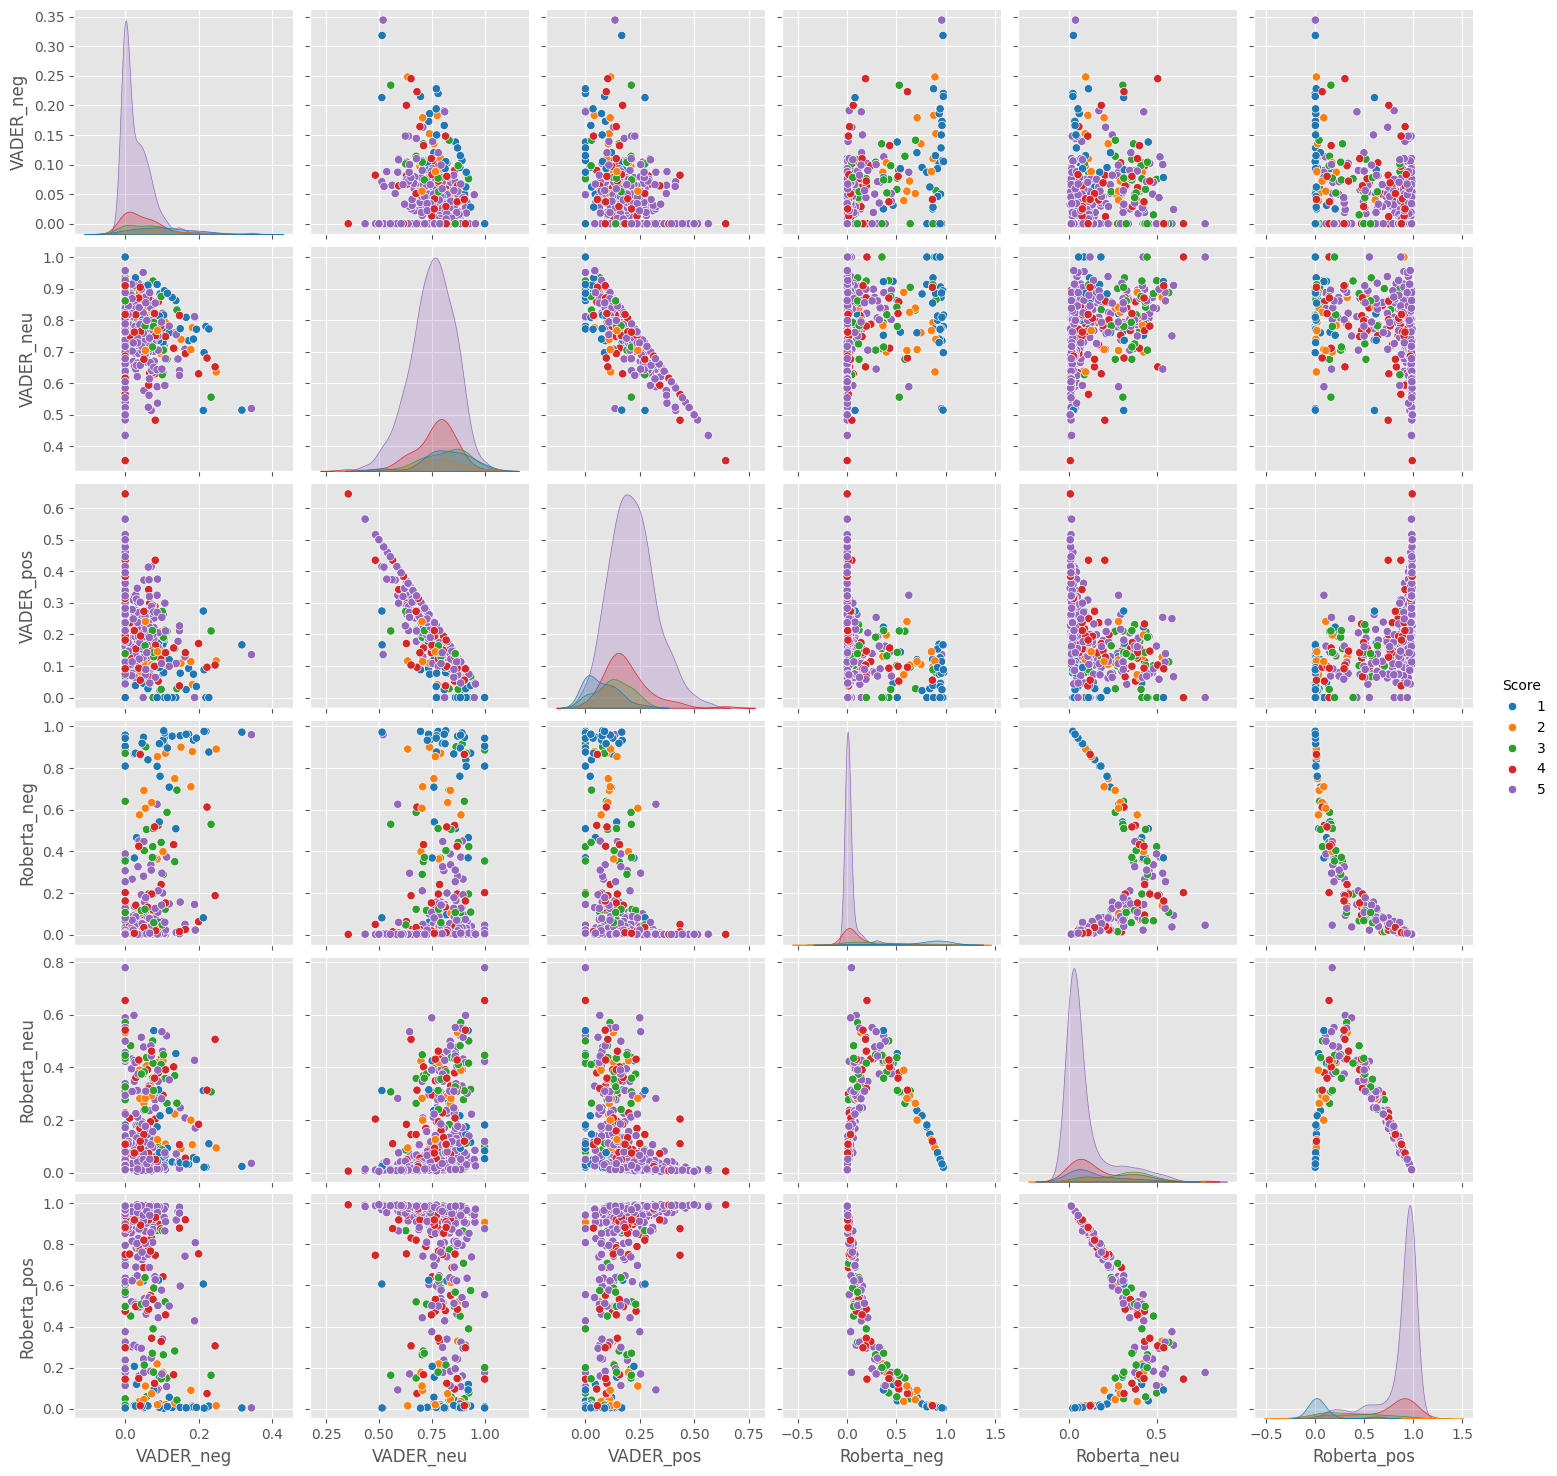

In [ ]:
sns.pairplot(data=df,
             vars=['VADER_neg', 'VADER_neu', 'VADER_pos', 
                   'Roberta_neg', 'Roberta_neu','Roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## **Data Export 02**

In [ ]:
# Create Restore Point
print('Exporting Data............')
print(df.shape)
df.to_pickle('Reviews_Processed_Data_02.pkl')

Exporting Data............
(501, 17)


In [ ]:
# Load Data From Restore Point
file = open('Reviews_Processed_Data_02.pkl','rb')
df = pickle.load(file)  # Needs Pandas Version < 2.0

# Dataframe Shape Before Removing Outliers
df.shape

(501, 17)

# **Compare Results**

In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'VADER_neg', 'VADER_neu', 'VADER_pos', 'VADER_comp', 'Roberta_neg',
       'Roberta_neu', 'Roberta_pos'],
      dtype='object')

## **Compare Rating Wise Positivity Scores**

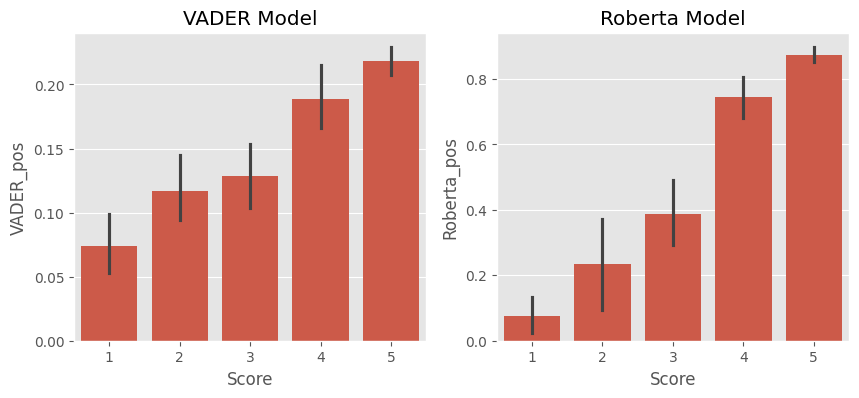

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(10,4))

sns.barplot(data=df,x='Score',y='VADER_pos',ax=axs[0])
sns.barplot(data=df,x='Score',y='Roberta_pos',ax=axs[1])
axs[0].set_title('VADER Model')
axs[1].set_title('Roberta Model')
plt.show()

## **Compare Rating Wise Neutrality Scores**

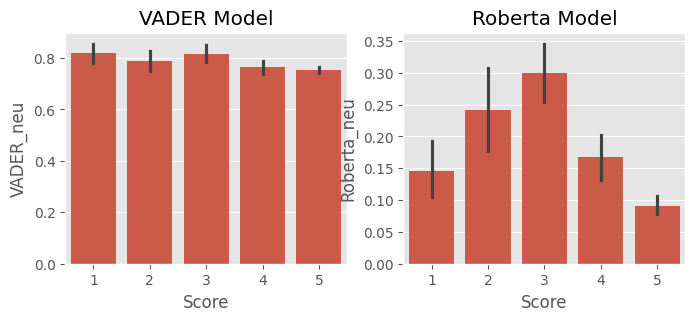

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(8,3))

sns.barplot(data=df,x='Score',y='VADER_neu',ax=axs[0])
sns.barplot(data=df,x='Score',y='Roberta_neu',ax=axs[1])
axs[0].set_title('VADER Model')
axs[1].set_title('Roberta Model')
plt.show()

## **Compare Rating Wise Negativity Scores**

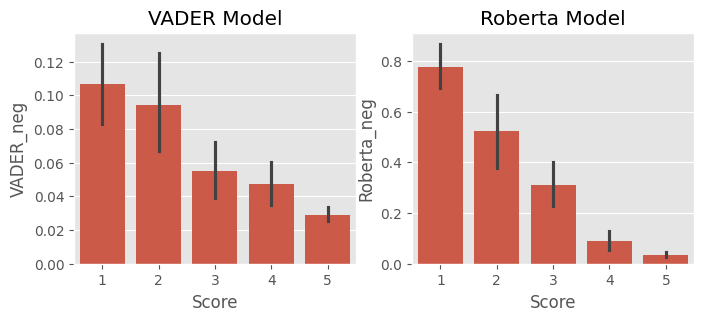

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(8,3))

sns.barplot(data=df,x='Score',y='VADER_neg',ax=axs[0])
sns.barplot(data=df,x='Score',y='Roberta_neg',ax=axs[1])
axs[0].set_title('VADER Model')
axs[1].set_title('Roberta Model')
plt.show()

## **Combined Comparison Plot**

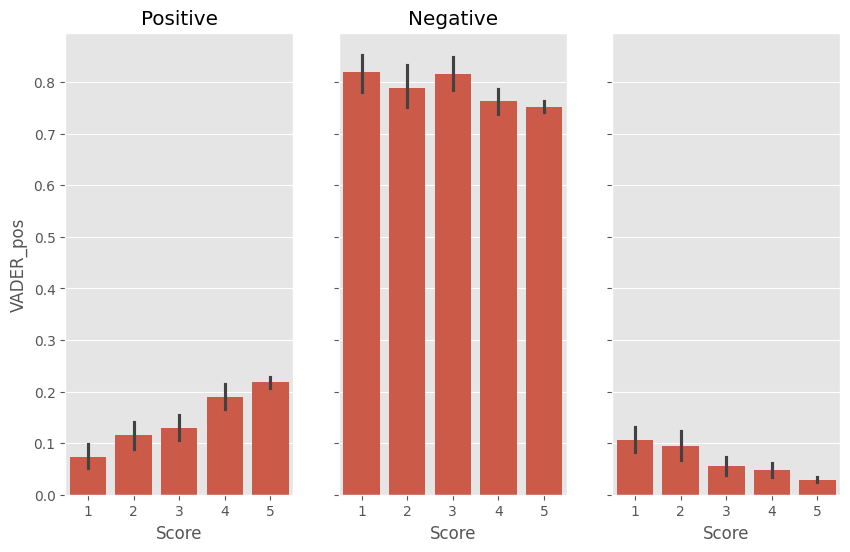

In [ ]:
fig,axs = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(10,6))

sns.barplot(data=df,x='Score',y='VADER_pos',ax=axs[0])
sns.barplot(data=df,x='Score',y='VADER_neu',ax=axs[1])
sns.barplot(data=df,x='Score',y='VADER_neg',ax=axs[2])
# sns.barplot(data=df,x='Score',y='Roberta_pos',ax=axs[3])
# sns.barplot(data=df,x='Score',y='Roberta_neu',ax=axs[4])
# sns.barplot(data=df,x='Score',y='Roberta_neg',ax=axs[5])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[1].set_title('Negative')
plt.show()

# **Sanity Check**

## **1 Star Reviews**

In [ ]:
# Best VADER Model Assessment Of 1 Star Review 
print(df.query('Score==1').sort_values('VADER_pos',ascending=False)['VADER_pos'].values[0])
df.query('Score==1').sort_values('VADER_pos',ascending=False)['Text'].values[0]

0.274


'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [ ]:
# Best Roberta Model Assessment Of 1 Star Review 
print(df.query('Score==1').sort_values('Roberta_pos',ascending=False)['Roberta_pos'].values[0])
df.query('Score==1').sort_values('Roberta_pos',ascending=False)['Text'].values[0]

0.6256364583969116


'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

## **5 Star Reviews**

In [ ]:
# Best VADER Model Assessment Of 5 Star Review 
print(df.query('Score==5').sort_values('VADER_neg',ascending=False)['VADER_neg'].values[0])
df.query('Score==5').sort_values('VADER_neg',ascending=False)['Text'].values[0]

0.344


'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
# Best Roberta Model Assessment Of 5 Star Review 
print(df.query('Score==5').sort_values('Roberta_neg',ascending=False)['Roberta_neg'].values[0])
df.query('Score==5').sort_values('Roberta_neg',ascending=False)['Text'].values[0]

0.9601579308509827


'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# **Transformer Pipeline**

In [194]:
from transformers import pipeline
Sent_Pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [195]:
Sent_Pipeline('I love Sentiment Analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [196]:
Sent_Pipeline('Hope you are doing fine......')

[{'label': 'POSITIVE', 'score': 0.999677300453186}]

In [197]:
Sent_Pipeline('Hmmm')

[{'label': 'NEGATIVE', 'score': 0.9940614104270935}]